# Customer Churn Analysis

In [1]:
# Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
cus_proj = pd.read_csv('Telecom_customer_churn.csv')

In [4]:
cus_proj

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
cus_proj.shape

(7043, 21)

Total number of Rows = 7043 and Columns = 21

In [6]:
cus_proj.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
cus_proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
cus_proj.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

From the above case, there are no null values present in the given dataset

In [9]:
cus_proj['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [10]:
cus_proj['TotalCharges'] = cus_proj['TotalCharges'].replace(' ',np.NaN)

In [11]:
cus_proj['TotalCharges'] = pd.to_numeric(cus_proj['TotalCharges'])

In [12]:
cus_proj.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

From the above case, there are some null values present in the column Total Charges

In [13]:
cus_proj['TotalCharges'] = cus_proj['TotalCharges'].replace(np.NaN,np.mean(cus_proj['TotalCharges']))

In [14]:
cus_proj.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Finally from the above case, there are no null values present in the given dataset

In [16]:
cus_proj.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
cus_proj.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [18]:
# Seperating both the Catagorical Data Columns and Continuous Data Column

In [19]:
cat_cols=[]
con_cols=[]

for i in cus_proj.columns:
    if cus_proj[i].dtype == 'object':
        cat_cols.append(i)
        print(cus_proj[i].value_counts())
    else:
        con_cols.append(i)

9931-KGHOA    1
2525-GVKQU    1
5593-SUAOO    1
0412-UCCNP    1
1952-DVVSW    1
             ..
4385-GZQXV    1
4759-TRPLW    1
6087-MVHJH    1
2230-XTUWL    1
1352-VHKAJ    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: in

In [20]:
cus_proj['MultipleLines'] = cus_proj['MultipleLines'].replace('No phone service','No')

In [21]:
for i in ['StreamingMovies','StreamingTV','TechSupport','DeviceProtection','OnlineBackup','OnlineSecurity']:
    cus_proj[i] = cus_proj[i].replace('No internet service','No')

In [22]:
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [23]:
for i in cat_cols:
    print(cus_proj[i].value_counts())

9931-KGHOA    1
2525-GVKQU    1
5593-SUAOO    1
0412-UCCNP    1
1952-DVVSW    1
             ..
4385-GZQXV    1
4759-TRPLW    1
6087-MVHJH    1
2230-XTUWL    1
1352-VHKAJ    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No     4072
Yes    2971
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64
No     4999
Yes    2044
Name: TechSupport, dtype: int64
No     4336
Yes    2707
Name: StreamingTV, dtype: int64
No     4311
Yes    2732
Name: StreamingMovies, dtype: int64
Month-to-month    3875
Two year          1695
One year 

In [24]:
cus_proj.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


From the above case, the data is widely spread

# Countplot ---

In [25]:
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

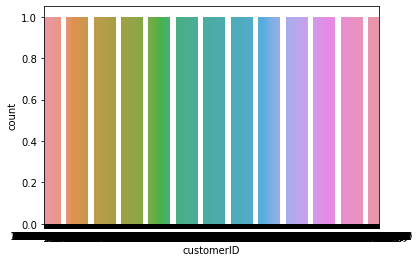

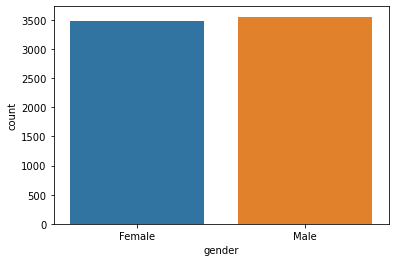

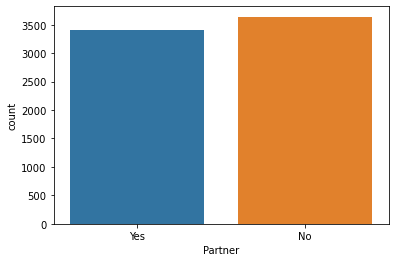

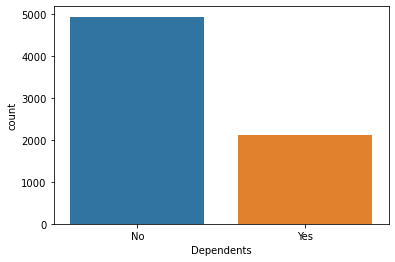

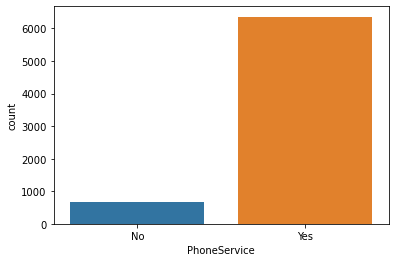

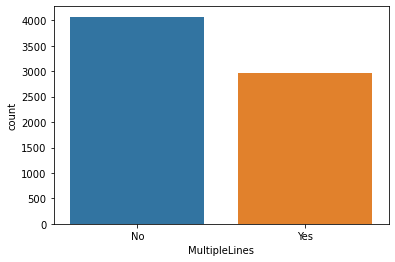

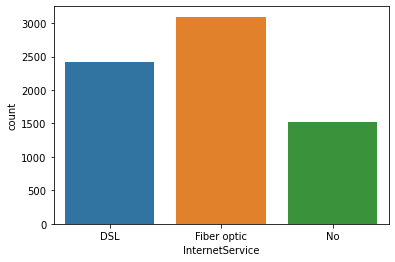

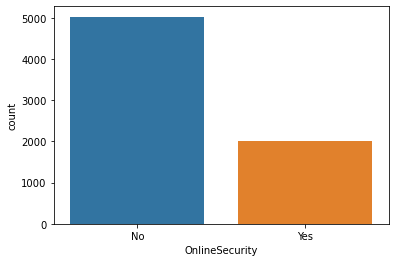

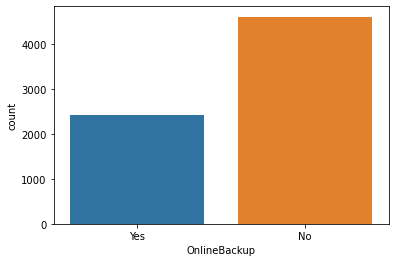

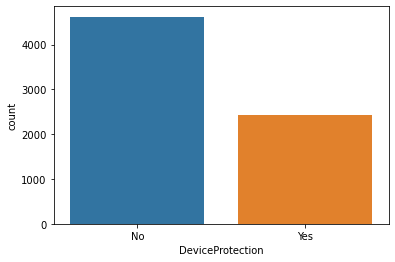

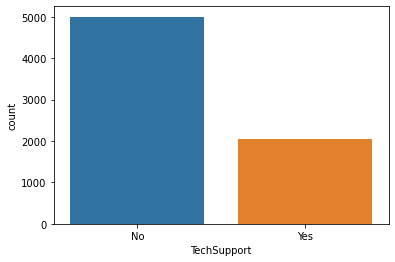

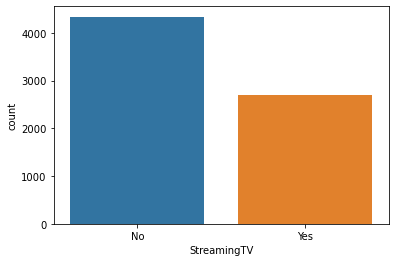

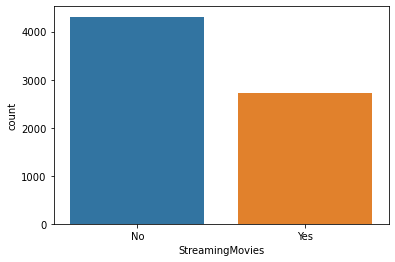

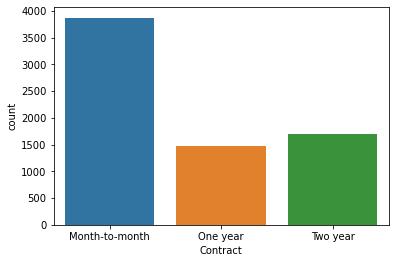

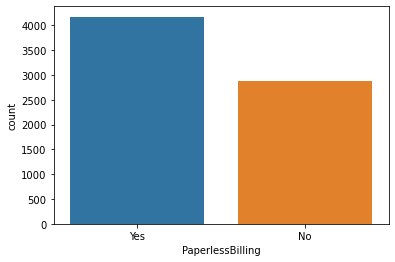

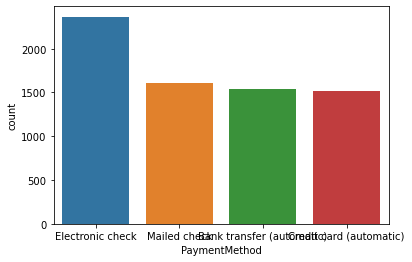

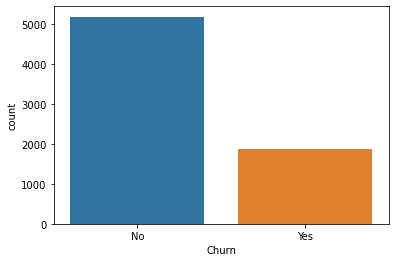

In [27]:
for i in cat_cols:
    sns.countplot(cus_proj[i])
    plt.show()

# EDA

# Normal Distribution Curve ---

In [28]:
con_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

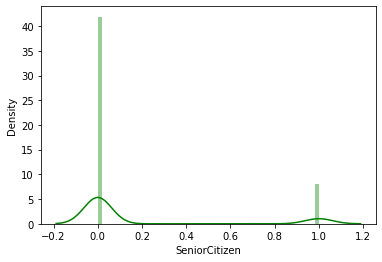

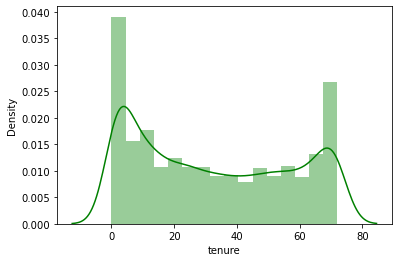

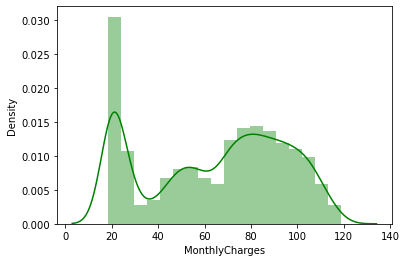

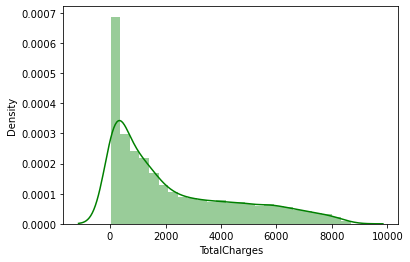

In [29]:
for i in con_cols:
    sns.distplot(cus_proj[i], color='green')
    plt.show()

From the above case, the data is not normally distributed and there are a lot of skewness that must be removed

In [30]:
cus_proj.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

# Checking Outliers ---

In [31]:
con_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

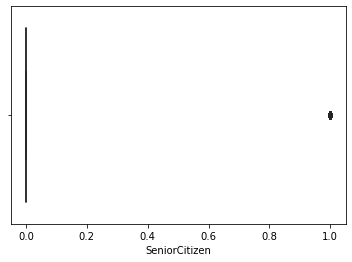

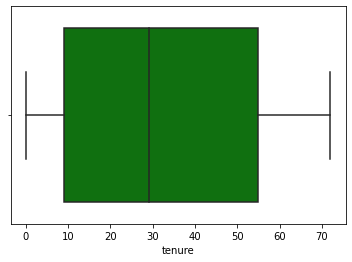

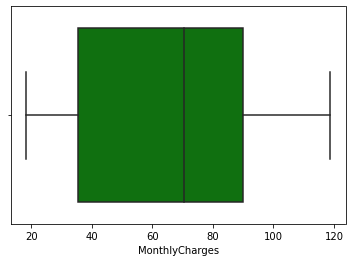

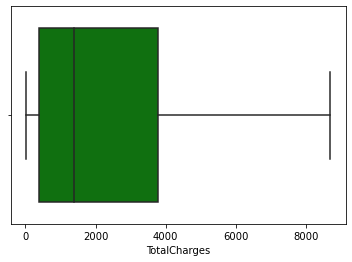

In [32]:
for i in con_cols:
    sns.boxplot(cus_proj[i], color='green')
    plt.show()

From the above case, the data does not have much outliers

# Correlation ---

In [33]:
cus_proj.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102395
tenure,0.016567,1.000000,0.247900,0.824757
MonthlyCharges,0.220173,0.247900,1.000000,0.650468
TotalCharges,0.102395,0.824757,0.650468,1.000000


Correlation using Heatmap ---

<AxesSubplot:>

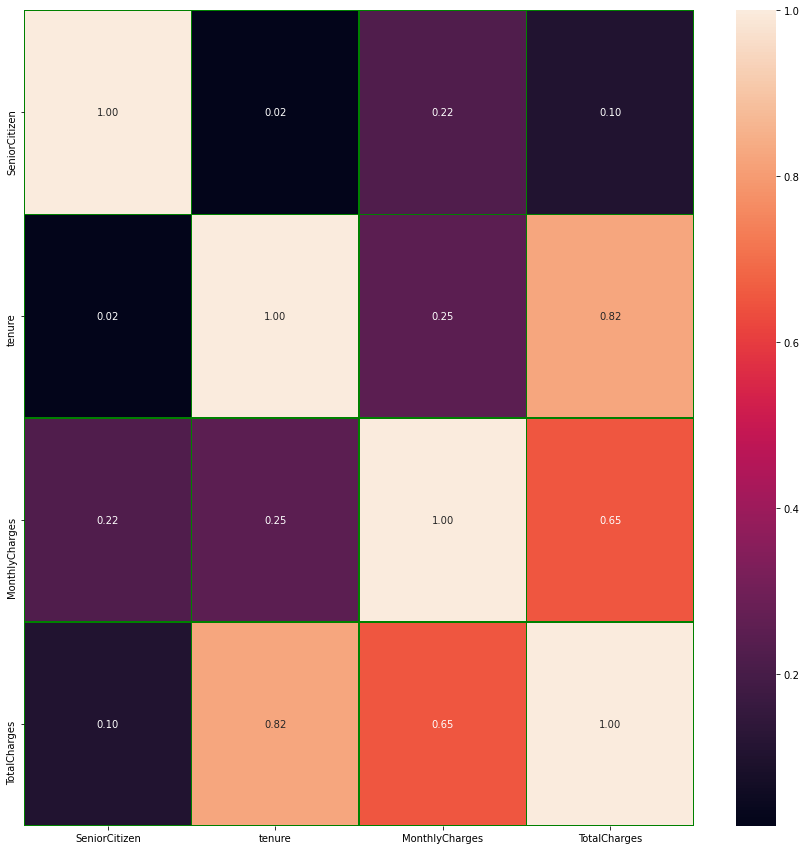

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(cus_proj.corr(), annot=True, linewidth=0.5, linecolor='green', fmt='.2f')

Removing the customerID as it doesnot have much impact on the data set

In [36]:
cus_proj = cus_proj.iloc[:,1:]
cat_cols = cat_cols.remove('customerID')

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in cus_proj.columns:
    if cus_proj[i].dtype == 'object':
        cus_proj[i] = le.fit_transform(cus_proj[i])

In [38]:
cus_proj

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# Checking Multicolinearity ---

In [39]:
x = cus_proj.iloc[:,:-1]
y = cus_proj.iloc[:,-1]

In [41]:
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as viff

def calc_vif(x1):
    vif = pd.DataFrame()
    vif["Variables"] = x1.columns
    vif['VIF Factor'] = [viff(x1.values,i) for i in range(x1.shape[1])]
    vif.index+=1
    return(vif)

In [42]:
calc_vif(x)

,Variables,VIF Factor
1,gender,1.953909
2,SeniorCitizen,1.370048
3,Partner,2.819847
4,Dependents,1.960939
5,tenure,14.256715
6,PhoneService,15.905037
7,MultipleLines,2.607664
8,InternetService,4.427340
9,OnlineSecurity,2.061425
10,OnlineBackup,2.300823


From the above case, the Monthly Charges are very collinear and hence we will remove it 

In [43]:
cus_proj.drop(['MonthlyCharges'], axis=1, inplace=True)

In [44]:
calc_vif(cus_proj.iloc[:,:-1])

,Variables,VIF Factor
1,gender,1.938061
2,SeniorCitizen,1.336057
3,Partner,2.816139
4,Dependents,1.959914
5,tenure,13.869640
6,PhoneService,8.950109
7,MultipleLines,2.467734
8,InternetService,4.384741
9,OnlineSecurity,1.978510
10,OnlineBackup,2.177965


In [45]:
from scipy.stats import zscore

z = np.abs(zscore(cus_proj))

In [46]:
for i in [3,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8]:
    CP1 = cus_proj.copy()
    CP_new = cus_proj[(z<i).all(axis=1)]
    loss = ((CP1.shape[0]-CP_new.shape[0])*100)/CP1.shape[0]
    print ("At i",i," LOSS% is",loss)

At i 3  LOSS% is 9.683373562402386
At i 3.2  LOSS% is 0.0
At i 3.4  LOSS% is 0.0
At i 3.6  LOSS% is 0.0
At i 3.8  LOSS% is 0.0
At i 4.0  LOSS% is 0.0
At i 4.2  LOSS% is 0.0
At i 4.4  LOSS% is 0.0
At i 4.6  LOSS% is 0.0
At i 4.8  LOSS% is 0.0


From the above case, we cannot afford 9.6% data loss hence ignoring it

In [47]:
x = cus_proj.iloc[:,:-1]
y = cus_proj.iloc[:,-1]

In [48]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
x,y = smt.fit_resample(x,y)

In [49]:
x.shape

(10348, 18)

Total number of Rows = 10348 and Columns = 18

In [50]:
y.shape

(10348,)

Total number of Rows = 10348

In [51]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
for i in cus_proj.columns:
    if np.abs(cus_proj[i].skew())>0.5:
        cus_proj[i] = pt.fit_transform(cus_proj[i].values.reshape(-1,1))
    elif np.abs(cus_proj[i].skew())<-0.5:
        cus_proj[i] = pt.fit_transform(cus_proj[i].values.reshape(-1,1))

In [52]:
from sklearn.preprocessing import StandardScaler

mms = StandardScaler()
x = mms.fit_transform(x)

# Logistic Regression ---

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

lg = LogisticRegression()
x_train = x
y_train = y
x_test = x
y_test = y
acc = 0
r_state = 0
for i in (0,10000):
    tr_x,t_x,tr_y,t_y=train_test_split(x,y,random_state=i,test_size=0.20)
    lg.fit(tr_x,tr_y)
    pred=lg.predict(t_x)
    if accuracy_score(t_y,pred)>acc:
        acc = accuracy_score(t_y,pred)
        x_train = tr_x
        x_test = t_x
        y_train = tr_y
        y_test = t_y
        r_state = i
print("At Random State",r_state,"Accuracy Score is Maximum i.e.,",acc)

At Random State 10000 Accuracy Score is Maximum i.e., 0.8144927536231884


In [54]:
def fun(f):
    f.fit(x_train,y_train)
    pred = f.predict(x_test)
    print("Accuracy Score",accuracy_score(y_test,pred))
    print("Confusion Matrix\n",confusion_matrix(y_test,pred))
    print("Classification Report\n",classification_report(y_test,pred))

In [55]:
fun(lg)

Accuracy Score 0.8144927536231884
Confusion Matrix
 [[763 269]
 [115 923]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.74      0.80      1032
           1       0.77      0.89      0.83      1038

    accuracy                           0.81      2070
   macro avg       0.82      0.81      0.81      2070
weighted avg       0.82      0.81      0.81      2070



# Cross Validation Score ---

In [56]:
from sklearn.model_selection import cross_val_score,KFold

def cvs(m):
    cv1 = KFold(n_splits=5,shuffle=True)
    score = cross_val_score(m,x,y,cv=cv1,scoring='accuracy')
    print("Cross Val Score",score)
    print(score.mean())

In [57]:
from sklearn.model_selection import GridSearchCV

def hypertuning(params,model):
    gd = GridSearchCV(model,params,cv=5,scoring='accuracy')
    gd.fit(x,y)
    print(gd.best_params_)

In [58]:
cvs(lg)

Cross Val Score [0.80096618 0.79468599 0.8        0.81633639 0.81778637]
0.8059549877067266


In [59]:
Acc = [81.44]
CVS = [80.59]
Model = ['Logistic Regression']

# Classifiers ---

In [60]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()

In [61]:
from sklearn.svm import SVC

params_svc = {
    'kernel':['poly','linear','rbf','sigmoid'],'degree':[1,3],'gamma':['auto','scale'],'shrinking':[True,False]}
hypertuning(params_svc,SVC())

{'degree': 1, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}


In [62]:
svc = SVC(degree=1,gamma='auto',kernel='rbf',shrinking=True)

In [63]:
fun(svc)
cvs(svc)

Accuracy Score 0.808695652173913
Confusion Matrix
 [[824 208]
 [188 850]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1032
           1       0.80      0.82      0.81      1038

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070

Cross Val Score [0.81932367 0.81111111 0.81256039 0.81198647 0.80860319]
0.8127169651842356


In [64]:
Acc.append(80.86)
CVS.append(81.27)
Model.append('SVC')

In [65]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
params_dtc = {'criterion':['gini','entropy'],'splitter':['random','best'],'max_depth':[10,20,30],'min_samples_split':[20,30,40]}
hypertuning(params_dtc,dtc)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 20, 'splitter': 'random'}


In [66]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=30,splitter='best')
fun(dtc)
cvs(dtc)

Accuracy Score 0.797584541062802
Confusion Matrix
 [[767 265]
 [154 884]]
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.74      0.79      1032
           1       0.77      0.85      0.81      1038

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070

Cross Val Score [0.80531401 0.80386473 0.8178744  0.79893668 0.81150314]
0.8074985932199036


In [67]:
Acc.append(79.75)
CVS.append(80.74)
Model.append('Decision Tree Classifier')

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
params_knc = {'n_neighbors':[5,7,9,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[30,40,50]}
hypertuning(params_knc,knc)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 9, 'weights': 'distance'}


In [69]:
knc = KNeighborsClassifier(algorithm='ball_tree',leaf_size=30,n_neighbors=9,weights='distance')
fun(knc)
cvs(knc)

Accuracy Score 0.7908212560386474
Confusion Matrix
 [[761 271]
 [162 876]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.74      0.78      1032
           1       0.76      0.84      0.80      1038

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070

Cross Val Score [0.79033816 0.79323671 0.79758454 0.78733688 0.79893668]
0.7934865964794307


In [70]:
Acc.append(79.08)
CVS.append(79.34)
Model.append('K Neighbors Classifier')

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
params_rf = {'n_estimators':[25,50,75,100],
           'criterion':['gini', 'entropy'],
           'max_depth':[10,20,30],
           'min_samples_split':[20,30,40]}
hypertuning(params_rf,rf)

{'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 20, 'n_estimators': 75}


In [72]:
rf = RandomForestClassifier(criterion='gini',max_depth=30,min_samples_split=20,n_estimators=100)
fun(rf)
cvs(rf)

Accuracy Score 0.8193236714975846
Confusion Matrix
 [[821 211]
 [163 875]]
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1032
           1       0.81      0.84      0.82      1038

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

Cross Val Score [0.8236715  0.8173913  0.82512077 0.83615273 0.82648623]
0.8257645061793253


In [73]:
Acc.append(81.93)
CVS.append(82.57)
Model.append('Random Forest Classifier')

In [74]:
from sklearn.tree import ExtraTreeClassifier

etc = ExtraTreeClassifier()
params_etc = {'criterion':['gini','entropy'],
            'splitter':['random','best'],
            'max_depth':[10,20,30],
            'min_samples_split':[20,30,40]}
hypertuning(params_etc,etc)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 30, 'splitter': 'best'}


In [75]:
etc = ExtraTreeClassifier(criterion='gini',max_depth=10,min_samples_split=30,splitter='best')
fun(etc)
cvs(etc)

Accuracy Score 0.8077294685990338
Confusion Matrix
 [[807 225]
 [173 865]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      1032
           1       0.79      0.83      0.81      1038

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070

Cross Val Score [0.78309179 0.80241546 0.80531401 0.8182697  0.80425326]
0.8026688427978697


In [76]:
Acc.append(80.77)
CVS.append(80.26)
Model.append('Extra Tree Classifier')

In [77]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
params_ada = {'n_estimators':[100,200,150,50],'learning_rate':[1,0.9,0.8],'algorithm':['SAMME', 'SAMME.R'],'random_state':[43,33,56]}
hypertuning(params_ada,ada)

{'algorithm': 'SAMME.R', 'learning_rate': 0.9, 'n_estimators': 100, 'random_state': 43}


In [78]:
ada = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.8,n_estimators=100,random_state=43)
fun(ada)
cvs(ada)

Accuracy Score 0.8169082125603865
Confusion Matrix
 [[775 257]
 [122 916]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.75      0.80      1032
           1       0.78      0.88      0.83      1038

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

Cross Val Score [0.81111111 0.82270531 0.81304348 0.8318028  0.81633639]
0.8189998202123363


In [79]:
Acc.append(81.69)
CVS.append(81.89)
Model.append('Ada Boost Classifier')

In [80]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [81]:
fun(xgb)

[02:14:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score 0.8463768115942029
Confusion Matrix
 [[849 183]
 [135 903]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1032
           1       0.83      0.87      0.85      1038

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



In [82]:
cvs(xgb)

[02:14:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:15:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:15:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:15:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [83]:
Acc.append(84.63)
CVS.append(84.40)
Model.append('XG Boost Classifier')

In [84]:
output = pd.DataFrame()
output['Models'] = Model
output['CVS'] = CVS
output['Accuracy'] = Acc
diff = []

for i in range(0,len(Acc)):
    diff.append(Acc[i]-CVS[i])
output['diff'] = diff
output.index+=1

In [85]:
output

,Models,CVS,Accuracy,diff
1,Logistic Regression,80.59,81.44,0.85
2,SVC,81.27,80.86,-0.41
3,Decision Tree Classifier,80.74,79.75,-0.99
4,K Neighbors Classifier,79.34,79.08,-0.26
5,Random Forest Classifier,82.57,81.93,-0.64
6,Extra Tree Classifier,80.26,80.77,0.51
7,Ada Boost Classifier,81.89,81.69,-0.20
8,XG Boost Classifier,84.40,84.63,0.23


From the above case, XG Boost Classifier is giving the highest accuracy of 84.63 with minimum difference between CVS hence saving it

# Model Saving ---

In [86]:
import pickle

filename = 'Churn_Project.pkl'
pickle.dump(xgb,open(filename,'wb'))

In [87]:
predict = xgb.predict(x_test)

In [88]:
output_1 = pd.DataFrame()
output_1['Actual'] = y_test
output_1['Predicted'] = predict
output_1

,Actual,Predicted
339,1,0
5947,1,0
9795,1,1
8421,1,1
9368,1,1
...,...,...
5192,0,0
887,0,0
929,0,0
9502,1,1


In [89]:
# Let's save the Dataframe in csv file

In [90]:
output_1.to_csv('Churn_prediction.csv')

# AUC ROC Curve ---

In [91]:
from sklearn.metrics import roc_curve,roc_auc_score

In [92]:
y_pred_prob = xgb.predict_proba(x_test)[:,1]

In [93]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

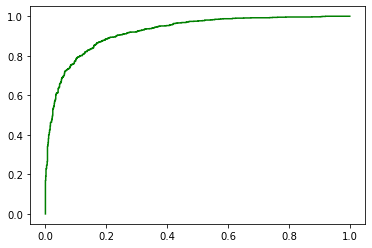

In [94]:
plt.plot(fpr,tpr, color='green')
plt.show()

The Accuracy scroe in case of XGB Classifier is the highest i.e. 84.63 